# Vehicle Insurance Claim Fraud Detection

Motor insurance is  more susceptible to insurance frauds. We have a dataset containing information about vehicle insurance claimed in certain months . We are using it to detect the fraud Vehicle Insurance Claim. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset

In [3]:
data=pd.read_csv('Downloads/Data science/fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Step 2: Feature Description

In [4]:
data.shape

(15420, 33)

Data contains 15420 rows and 33 columns.

In [5]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

Feature description

1. Month - months in which the accident occured

2. WeekOfMonth - provides the week in the month the accident occured

3. DayOfWeek - contains days of the week on which accident occured 

4. Make - contains a list of 19 car manufacturers

5. AccidentArea - classifies area for accident as "Urban" or "Rural"

6. DayOfWeekClaimed - contains the day of the week the claim was filed

7. MonthClaimed - contains month of the year the claim was filed

8. WeekOfMonthClaimed - contains weeks in the month that the claimed in filed

9. Sex - gender of individual making claim

10. MaritalStatus - marital status of individual making claim

11. Age - ages of individual making claim

12. Fault - categorization of who was deemed at fault

13. PolicyType - contains two pieces of info,the type of insurance on the car(liability,all perils,collision) and category   of the vehicle - sport, sedan, utility 

14. VehicleCategory - contains the categorization of the vehicle (sport, sedan, utility)

15. VehiclePrice - contains ranges for the value of the vehicle

16. FraudFound_P - indicats whether the claim was fraudulant (1) or not (0),(this is what we want to predict)
                 
17. PolicyNumber - the masked policy number

18. RepNumber - rep number is integer from 1 - 16

19. Deductible - the deductible amount

20. DriverRating - Rating of the driver. The scale is 1, 2, 3, 4

21. Days_Policy_Accident - This is the number of days between when the policy was purchased and the accident occured

22. Days_Policy_Claim - This is the number of days that pass between the policy was purchased and the claim was filed

23. PastNumberOfClaims - previous number of claims filed by policy holder 

24. AgeOfVehicle - represents age of vehicle at time of the accident

25. AgeOfPolicyHolder - each value is a range of ages

26. PoliceReportFiled - indicates whether a police report was filed for the accident

27. WitnessPresent - indicted whether a witness was present

28. AgentType - this classifies an agent who is handling the claim as internal vs external

39. NumberOfSuppliments - number of suppliment claim for additional repair or replacement costs.

30. AddressChange_Claim - time from claim was filled to when person moved (i.e. filed an address change)

31. NumberOfCars - number of cars covered under policy

32. Year - year in which accident occured

33. BasePolicy - type of insurance coverage(liability, all perils, collision)



# Step 3: Preprocessing

#  Verify missing values

In [6]:
data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [8]:
print('Month',data['Month'].unique())
print('WeekOfMonth',data['WeekOfMonth'].unique())
print('DayOfWeek',data['DayOfWeek'].unique())
print('Make',data['Make'].unique())
print('AccidentArea',data['AccidentArea'].unique())
print('DayOfWeekClaimed',data['DayOfWeekClaimed'].unique())
print('MonthClaimed',data['MonthClaimed'].unique())
print('WeekOfMonthClaimed',data['WeekOfMonthClaimed'].unique())
print('Sex',data['Sex'].unique())
print('MaritalStatus',data['MaritalStatus'].unique())
print('Age',data['Age'].unique())
print('Fault',data['Fault'].unique())
print('PolicyType',data['PolicyType'].unique())
print('VehicleCategory',data['VehicleCategory'].unique())
print('VehiclePrice',data['VehiclePrice'].unique())
print('FraudFound_P',data['FraudFound_P'].unique())
print('PolicyNumber',data['PolicyNumber'].unique())
print('RepNumber',data['RepNumber'].unique())
print('Deductible',data['Deductible'].unique())
print('DriverRating',data['DriverRating'].unique())
print('Days_Policy_Accident', data['Days_Policy_Accident'].unique())
print('Days_Policy_Claim',data['Days_Policy_Claim'].unique())
print('PastNumberOfClaims',data['PastNumberOfClaims'].unique())
print('AgeOfVehicle',data['AgeOfVehicle'].unique())
print('AgeOfPolicyHolder',data['AgeOfPolicyHolder'].unique())
print('PoliceReportFiled',data['PoliceReportFiled'].unique())
print('WitnessPresent',data['WitnessPresent'].unique())
print('AgentType',data['AgentType'].unique())
print('NumberOfSuppliments',data['NumberOfSuppliments'].unique())
print('AddressChange_Claim',data['AddressChange_Claim'].unique())
print('NumberOfCars',data['NumberOfCars'].unique())
print('Year',data['Year'].unique())
print('BasePolicy',data['BasePolicy'].unique())

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth [5 3 2 4 1]
DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea ['Urban' 'Rural']
DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed [1 4 2 3 5]
Sex ['Female' 'Male']
MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']
Age [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault ['Policy Holder' 'Third Party']
PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'


Missing values

When we calculated total number of missing values in each column the output was no missing values in any of the columns. But when we check the unique values of each column we can see that some of the columns have 0 as value. They are the missing values in that particular column. Lets us check which are columns.

1. DayOfWeekClaimed - This column data type is object . But we can see 0 in it . so they are the missing values in that column.

2. MonthClaimed - This column data type is object . But we can see 0 in it . so they are the missing values in that column.

3. Age - Also contains 0 which are considered as the missing values

In [9]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed

print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0


In [10]:
#We see there is only one row where either the DayOfWeekClaimed or MonthClaimed are 0. 
#So let us locate the row and change 0.

data.loc[(data['DayOfWeekClaimed']=='0')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [11]:
data.loc[(data['MonthClaimed']=='0')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Both are zero in the same row (row 1516). 

In [12]:
data['MonthClaimed'].mode()

0    Jan
dtype: object

In [13]:
data['MonthClaimed'][1516]='Jan'

In [14]:
data['MonthClaimed'][1516]

'Jan'

In [15]:
data['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct'], dtype=object)

In [16]:
data['DayOfWeekClaimed'].mode()

0    Monday
dtype: object

In [17]:
data['DayOfWeekClaimed'][1516]='Monday'

In [18]:
data['DayOfWeekClaimed'][1516]

'Monday'

In [19]:
data['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

We can see that 0 is removed. from both the columns.

In [20]:
#Investigate the 0 in Age
print("There are",len(data[data['Age']==0]) ,'missing values which are shown as 0 in this column.' )

There are 320 missing values which are shown as 0 in this column.


In [21]:
k=data['Age'].loc[data['Age']==0].index

In [22]:
k

Int64Index([    7,    13,    28,    31,    58,    62,    84,   119,   120,
              161,
            ...
            14749, 14802, 14891, 14938, 14967, 15243, 15262, 15274, 15379,
            15392],
           dtype='int64', length=320)

In [23]:
data.loc[k, ['Age', 'AgeOfPolicyHolder']]

,Age,AgeOfPolicyHolder
7,0,16 to 17
13,0,16 to 17
28,0,16 to 17
31,0,16 to 17
58,0,16 to 17
...,...,...
15243,0,16 to 17
15262,0,16 to 17
15274,0,16 to 17
15379,0,16 to 17


In [24]:
data.loc[1:8, ['Age', 'AgeOfPolicyHolder']]

,Age,AgeOfPolicyHolder
1,34,31 to 35
2,47,41 to 50
3,65,51 to 65
4,27,31 to 35
5,20,21 to 25
6,36,36 to 40
7,0,16 to 17
8,30,31 to 35


During our investigation of the feature 'Age' being set to 0, we have seen that there are many rows who's 'Age' does not correspond to the age range for 'AgeOfPolicyHolder'. For example see row 4 Age is given 27 but Age of policy holder is in the range 31 to 35. A somewhat reasonable assumption, is that the individual driving at the time of the accident was not the policy holder, but another individual.

Therefore here we can replace the 0 with the mean value of the interval. Since the interval corresponding to all 0 is in the range between 16 and 17 we can give 16.5

In [25]:
a=list(k)

In [26]:
for i in a:
    data['Age'][a]=16.5

In [27]:
len(data[data['Age']==0])

0

So the missing value are filled with the new values.

In [28]:
data.loc[k, ['Age', 'AgeOfPolicyHolder']].head()

,Age,AgeOfPolicyHolder
7,16.5,16 to 17
13,16.5,16 to 17
28,16.5,16 to 17
31,16.5,16 to 17
58,16.5,16 to 17


In [29]:
#Before going on to remaining preprocessing we can go through exploratory data analysis.

# Step 4: Exploratory Data Analysis

# Chi- square test

The goal here is to gather some insight into the relationship between our observations and the desired predicted feature, 'FraudFound_P'.

In [30]:
import scipy.stats as stats

data_chi_result=[]
for i in data.columns:
    chi2_val, p_val, dof2, ex1 = stats.chi2_contingency(pd.crosstab(data[i], data['FraudFound_P']))
    data_chi_result.append([i,chi2_val,p_val])
    
chi_df = pd.DataFrame(data_chi_result, columns=['Features', 'Chi2 val', 'p-val'])
chi_df.sort_values(by='p-val',ascending=True, inplace=True)    



In [31]:
print(chi_df[chi_df['p-val']<0.05])

                Features      Chi2 val         p-val
15          FraudFound_P  15402.235059  0.000000e+00
12            PolicyType    437.401870  1.848256e-89
32            BasePolicy    402.851921  3.325192e-88
13       VehicleCategory    290.942140  6.648398e-64
11                 Fault    264.953824  1.428036e-59
29   AddressChange_Claim    104.733773  9.652105e-22
18            Deductible     72.415180  1.297108e-15
14          VehiclePrice     67.768295  2.983598e-13
22    PastNumberOfClaims     53.500831  1.433718e-11
3                   Make     59.809999  2.195889e-06
6           MonthClaimed     42.194866  1.498618e-05
4           AccidentArea     16.844310  4.057480e-05
24     AgeOfPolicyHolder     33.003254  6.150520e-05
8                    Sex     13.489894  2.398518e-04
28   NumberOfSuppliments     18.140572  4.114406e-04
10                   Age    109.568010  4.569895e-04
0                  Month     29.796429  1.705480e-03
23          AgeOfVehicle     21.929005  2.6129

RESULT: These features have a strong relation with 'FraudFound_P'

# Visualization

Visualisation of the some of the above features vs FraudFound_p.

<AxesSubplot:xlabel='PolicyType', ylabel='FraudFound_P'>

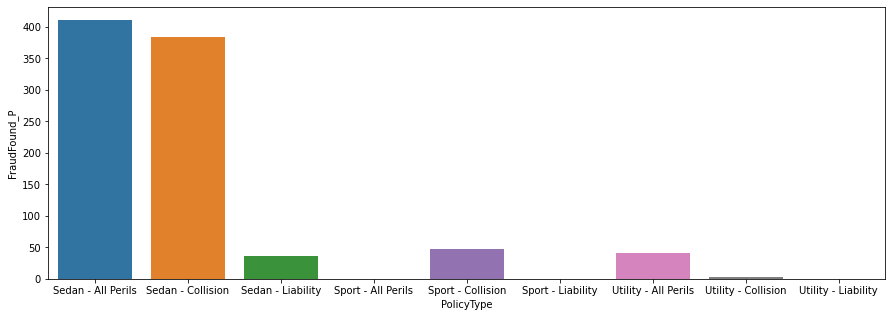

In [32]:
x=data.groupby('PolicyType').agg({'FraudFound_P':'sum'}).reset_index()
plt.subplots(figsize=(15,5))
sns.barplot(x='PolicyType', y='FraudFound_P', data = x)

RESULT: From the graph it is clear that more fraud insurance claim comes in Policy type 'Sedan-All Perils'.

<AxesSubplot:xlabel='AccidentArea', ylabel='FraudFound_P'>

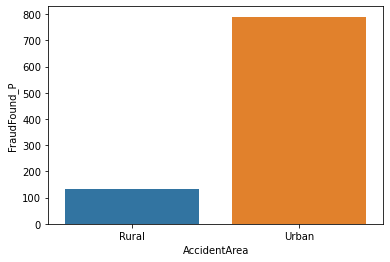

In [33]:
y=data.groupby('AccidentArea').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='AccidentArea', y='FraudFound_P', data = y)

RESULT: From the graph it is clear that more fraud insurance claim comes from Urban area . Also more accidents occurs there.

<AxesSubplot:xlabel='VehicleCategory', ylabel='FraudFound_P'>

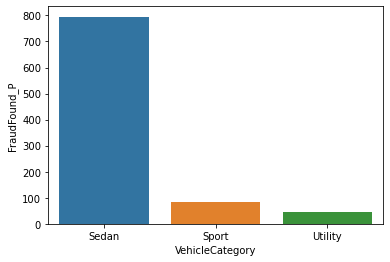

In [34]:
z=data.groupby('VehicleCategory').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='VehicleCategory', y='FraudFound_P', data = z)

RESULT: Majority of fraud claim come from Vehicle category-Sedan

<AxesSubplot:xlabel='BasePolicy', ylabel='FraudFound_P'>

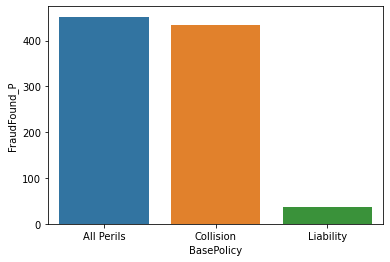

In [35]:
p=data.groupby('BasePolicy').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='BasePolicy', y='FraudFound_P', data = p)

RESULT: Majority of fraud claim come from Base policy-All perils.

<AxesSubplot:xlabel='Fault', ylabel='FraudFound_P'>

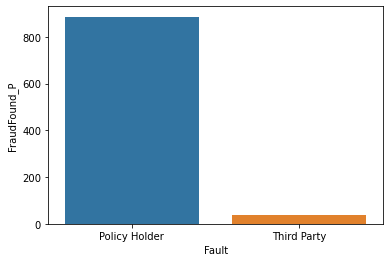

In [36]:
q=data.groupby('Fault').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='Fault', y='FraudFound_P', data = q)

RESULT: Majority of fraud claim are done by policy holders.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '20000 to 29000'),
  Text(1, 0, '30000 to 39000'),
  Text(2, 0, '40000 to 59000'),
  Text(3, 0, '60000 to 69000'),
  Text(4, 0, 'less than 20000'),
  Text(5, 0, 'more than 69000')])

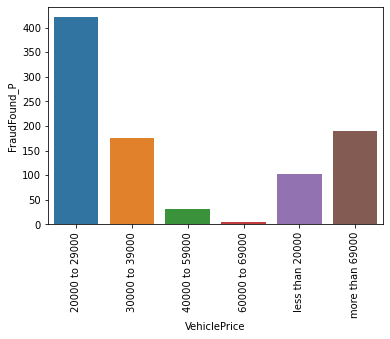

In [37]:
r=data.groupby('VehiclePrice').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='VehiclePrice', y='FraudFound_P', data = r)
plt.xticks(rotation=90)

RESULT: Most of the fraud claim is done for vehicle price - 20000 to 29000

<AxesSubplot:xlabel='Sex', ylabel='FraudFound_P'>

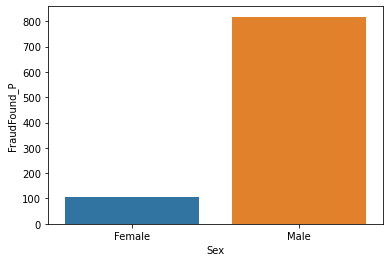

In [38]:
s=data.groupby('Sex').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='Sex', y='FraudFound_P', data = s)

RESULT: Majority of fraud claim are done by male.

<AxesSubplot:xlabel='WitnessPresent', ylabel='FraudFound_P'>

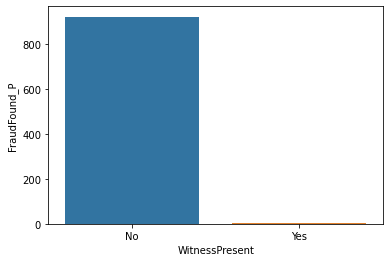

In [39]:
t=data.groupby('WitnessPresent').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='WitnessPresent', y='FraudFound_P', data = t)

RESULT: Majority of fraud claim done if there is not witness for accident.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2 years'),
  Text(1, 0, '3 years'),
  Text(2, 0, '4 years'),
  Text(3, 0, '5 years'),
  Text(4, 0, '6 years'),
  Text(5, 0, '7 years'),
  Text(6, 0, 'more than 7'),
  Text(7, 0, 'new')])

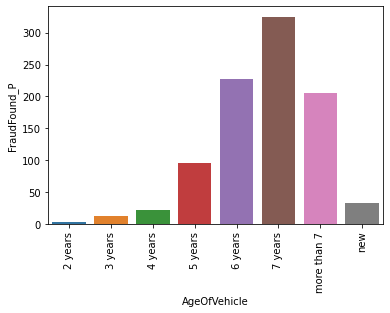

In [40]:
u=data.groupby('AgeOfVehicle').agg({'FraudFound_P':'sum'}).reset_index()
sns.barplot(x='AgeOfVehicle', y='FraudFound_P', data = u)
plt.xticks(rotation=90)

RESULT: Majority of fraud claim from vehicle of age 7 years.

# Step 5: Splitting data as feature columns and target column

In [41]:
#feature column
X=data.drop(['FraudFound_P'],axis=1)
#target column
y=pd.DataFrame(data['FraudFound_P'])

# Step 6: Again Preprocess the data

We have already done one preprocessing(filling missing values). Next we are going to do encoding and standardisation

# Encoding

# Label Encoding

In [42]:
#label encoding of features Month , DayOfWeek , Make , DayOfWeekClaimed ,MonthClaimed , PolicyType , VehiclePrice ,Days_Policy_Accident , Days_Policy_Claim ,  PastNumberOfClaims , AgeOfVehicle , AgeOfPolicyHolder , NumberOfSuppliments , AddressChange_Claim , NumberOfCars
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
h=['Month','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','PolicyType','VehiclePrice','Days_Policy_Accident', 'Days_Policy_Claim',  'PastNumberOfClaims' , 'AgeOfVehicle' , 'AgeOfPolicyHolder' , 'NumberOfSuppliments' , 'AddressChange_Claim' , 'NumberOfCars','Year']
for i in np.arange(len(h)):
    X[h[i]] = label_en.fit_transform(X[h[i]])  

In [43]:
X.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,Urban,5,4,1,Female,Single,...,1,3,No,No,External,3,0,2,0,Liability
1,4,3,6,6,Urban,1,4,4,Male,Single,...,4,4,Yes,No,External,3,3,0,0,Collision
2,10,5,0,6,Urban,4,9,2,Male,Married,...,5,6,No,No,External,3,3,0,0,Collision
3,6,2,2,17,Rural,0,5,1,Male,Married,...,6,7,Yes,No,External,2,3,0,0,Liability
4,4,5,1,6,Urban,5,3,2,Female,Single,...,3,4,No,No,External,3,3,0,0,Collision


Description of Label encodings of each feature column

Feature column: Month,MonthClaimed
    
    Jan - 4
    
    Feb - 3
    
    Mar - 7
    
    Apr - 0
    
    May - 8
    
    Jun - 5
    
    Jul - 6
    
    Aug - 1
    
    Sep - 11
    
    Oct - 10
    
    Nov - 9
    
    Dec - 2

Feature column - DayofWeek,DayOfWeekClaimed

Monday - 1

Tuesday - 5

Wednesday - 6

Thursday - 4

Friday - 0

Saturday - 2

Sunday - 3

Feature column - Make 

Honda - 6

Toyota - 17

Ford - 5

Mazda - 9

Chevrolet - 2

Pontiac - 13

Accura - 0

Dodge - 3 
 
Mercury - 11

Jaguar - 7

Nisson - 12

VW - 18

Saab - 15

Saturn - 16

Porche - 14

BMW - 1

Mecedes - 10

Ferrari - 4

Lexus - 8

Feature column - PolicyType

Sport - Liability - 5

Sport - Collision - 4

Sedan - Liability - 2

Utility - All Perils - 6

Sedan - All Perils - 0

Sedan - Collision  - 1

Utility - Collision - 7

Utility - Liability -  8

Sport - All Perils - 3

Feature column - Days_Policy_Accident

more than 30 - 3

15 to 30 - 2

none - 4

1 to 7 - 0

8 to 15 - 1

Feature column - VehiclePrice

more than 69000 - 5

20000 to 29000 - 0

30000 to 39000 - 1

less than 20000 - 4

40000 to 59000 - 2

60000 to 69000 - 3

Feature Column - Days_Policy_Claim

more than 30 - 2

15 to 30 - 1

8 to 15 - 0

none - 3

Feature Column - PastNumberOfClaims

none - 3

1 - 0

2 to 4 - 1

more than 4 - 2


Feature Column - AgeOfVehicle

3 years - 1

6 years - 4

7 years - 5

more than 7 - 6

5 years - 3

new - 7

4 years - 2

2 years - 0

Feature Column - AgeOfPolicyHolder

26 to 30 - 3

31 to 35 - 4 

41 to 50 - 6

51 to 65 - 7

21 to 25 - 2

36 to 40 - 5

16 to 17 - 0

over 65 - 8

18 to 20 - 1

Feature Column - NumberOfSuppliments

none - 3

more than 5 - 2

3 to 5 - 1

1 to 2 - 0

Feature Column - AddressChange_Claim

1 year - 0

no change - 3

4 to 8 years - 2

2 to 3 years - 1

under 6 months - 4

Feature Column - NumberOfCars

3 to 4 - 2

1 vehicle - 0

2 vehicles - 1

5 to 8 - 3

more than 8  - 4

Feature column - Year

1994 - 0

1995 - 1 

1996 - 2

# One-hot encoding

In [44]:
X = pd.get_dummies(X)

In [45]:
X.head()

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,PolicyType,VehiclePrice,...,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,2,5,6,6,5,4,1,21.0,5,5,...,0,1,0,1,0,1,0,0,0,1
1,4,3,6,6,1,4,4,34.0,4,5,...,0,0,1,1,0,1,0,0,1,0
2,10,5,0,6,4,9,2,47.0,4,5,...,0,1,0,1,0,1,0,0,1,0
3,6,2,2,17,0,5,1,65.0,2,0,...,0,0,1,1,0,1,0,0,0,1
4,4,5,1,6,5,3,2,27.0,4,5,...,0,1,0,1,0,1,0,0,1,0


# Standardisation

In [46]:
X.describe()

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,PolicyType,VehiclePrice,...,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,5.532101,2.788586,2.915759,10.114591,3.202918,5.596044,2.693969,40.198119,1.260636,1.291829,...,0.025357,0.972244,0.027756,0.994358,0.005642,0.984371,0.015629,0.288521,0.386641,0.324838
std,3.409595,1.287585,2.055485,5.282919,2.273761,3.410562,1.259115,12.660221,1.190999,1.837535,...,0.157211,0.164279,0.164279,0.074904,0.074904,0.124039,0.124039,0.453090,0.486996,0.468329
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,3.000000,2.000000,31.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,4.000000,6.000000,3.000000,38.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,4.000000,5.000000,13.000000,5.000000,9.000000,4.000000,48.000000,2.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,11.000000,5.000000,6.000000,18.000000,6.000000,11.000000,5.000000,80.000000,8.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X= sc.fit_transform(X)

In [48]:
X=pd.DataFrame(X)

In [49]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,...,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04,1.542000e+04
mean,-3.082705e-16,1.502019e-15,7.038612e-17,-1.819268e-16,2.255942e-16,9.403056e-16,1.592688e-16,-7.423087e-17,-1.048774e-15,5.296023e-15,...,-6.532388e-16,-4.411545e-15,4.418727e-15,-1.661315e-15,1.543581e-15,-5.629738e-16,6.117026e-16,1.636859e-15,-2.981762e-16,2.826101e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-1.622562e+00,-1.389146e+00,-1.418572e+00,-1.914646e+00,-1.408689e+00,-1.640852e+00,-1.345408e+00,-1.911412e+00,-1.058504e+00,-7.030456e-01,...,-1.612959e-01,-5.918449e+00,-1.689632e-01,-1.327559e+01,-7.532620e-02,-7.936208e+00,-1.260048e-01,-6.368074e-01,-7.939558e-01,-6.936323e-01
25%,-7.426639e-01,-6.124734e-01,-9.320529e-01,-7.788733e-01,-9.688748e-01,-7.612025e-01,-5.511738e-01,-7.265606e-01,-1.058504e+00,-7.030456e-01,...,-1.612959e-01,1.689632e-01,-1.689632e-01,7.532620e-02,-7.532620e-02,1.260048e-01,-1.260048e-01,-6.368074e-01,-7.939558e-01,-6.936323e-01
50%,1.372345e-01,1.641993e-01,4.098496e-02,-2.109871e-01,3.505679e-01,1.184465e-01,2.430604e-01,-1.736297e-01,-2.188449e-01,-7.030456e-01,...,-1.612959e-01,1.689632e-01,-1.689632e-01,7.532620e-02,-7.532620e-02,1.260048e-01,-1.260048e-01,-6.368074e-01,-7.939558e-01,-6.936323e-01
75%,7.238334e-01,9.408720e-01,1.014023e+00,5.461946e-01,7.903821e-01,9.980955e-01,1.037295e+00,6.162715e-01,6.208139e-01,-1.588205e-01,...,-1.612959e-01,1.689632e-01,-1.689632e-01,7.532620e-02,-7.532620e-02,1.260048e-01,-1.260048e-01,1.570334e+00,1.259516e+00,1.441686e+00
max,1.603732e+00,1.717545e+00,1.500542e+00,1.492672e+00,1.230196e+00,1.584528e+00,1.831529e+00,3.143955e+00,5.658767e+00,2.018080e+00,...,6.199785e+00,1.689632e-01,5.918449e+00,7.532620e-02,1.327559e+01,1.260048e-01,7.936208e+00,1.570334e+00,1.259516e+00,1.441686e+00


# Step 7: Splitting of data as train data and test data

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
X_train.shape

(10794, 45)

In [52]:
X_test.shape

(4626, 45)

In [53]:
y_train.shape

(10794, 1)

In [54]:
y_test.shape

(4626, 1)

# Step 8: Bulding Model

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred1=lr.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [62]:
accuracy_score(y_test,y_pred1)

0.9383916990920882

In [65]:
confusion_matrix(y_test,y_pred1)

array([[4341,    0],
       [ 285,    0]], dtype=int64)

There are 285 misclassification values.

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred2=dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred2)

0.9051015996541288

In [66]:
confusion_matrix(y_test,y_pred2)

array([[4106,  235],
       [ 204,   81]], dtype=int64)

There are 439 misclassifications.

# Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred3=rf.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred3)

0.9386078685689581

In [71]:
confusion_matrix(y_test,y_pred3)

array([[4341,    0],
       [ 284,    1]], dtype=int64)

There are 284 misclassifications.

# Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [75]:
y_pred4=gb.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred4)

0.940337224383917

In [77]:
confusion_matrix(y_test,y_pred4)

array([[4338,    3],
       [ 273,   12]], dtype=int64)

280 misclassifications

RESULT: Comparing the accuracy score of 4 models Gradient boosting have highest accuracy and it have lesser misclasssifications compared to others. So it is the best model to predict the fraud vehicle insurance claim.

# Step 9: Hyperparameter Tuning

# Tuning 1

In [98]:
gbt=GradientBoostingClassifier(n_estimators = 1000, max_depth = 15 ,random_state = 25)

In [99]:
gbt.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=15, n_estimators=1000, random_state=25)

In [100]:
y_pred5=gbt.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred5)

0.9416342412451362

# Tuning 2

In [102]:
gbtt=GradientBoostingClassifier(n_estimators = 500, max_depth = 10 ,random_state = 22)

In [103]:
gbtt.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=22)

In [104]:
y_pred6=gbtt.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred6)

0.9420665801988759

We can see that the accuracy increased after tuning.

CONCLUSION: Our aim was to find a model to predict the fraud vehicle insurance claim. We had a data of some insurance claimers. We followed certain steps to predict the fraud vehicle claim. First We processed the data in three steps by filling missing values, encoding and standardising. We also plotted many graphs and found some results from that. Finally we fitted the model for prediction. After fitting and hyperparameter tuning we found out that Gradient Boosting is the best model for predicting fraud vehicle insurance claim.

# Submitted by Team 9



1. SRUTHY B S

2. GOKUL M S

3. ROSHAN K RAJU

4. NEERAJA RAVI